<a href="https://colab.research.google.com/github/enjoyPG/2023Gifted/blob/main/students/jwoo428/pytorch/7%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#u-net : 인코더, 디코더 구조를 갖는 대표적인 딥러닝 모델

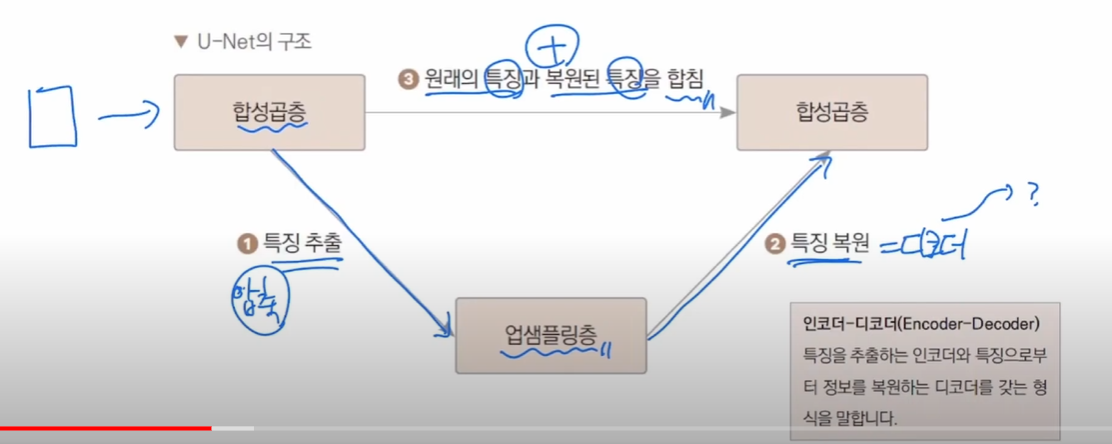

In [1]:
#입력과 정답 이미지 확인하기

In [5]:
import matplotlib.pyplot as plt

from PIL import Image

path_to_annotation = "/content/drive/MyDrive/Colab Notebooks/data/CH07/annotations/trimaps/"
path_to_image = "/content/drive/MyDrvie/Colab Notebooks/data/CH07/images/"

#이미지 불러오기
annotation = Image.open(path_to_annotation + "Abyssinian_1.png")
plt.subplot(1,2,1)
plt.title("annotation")
plt.imshow(annotation)
image = Image.open(path_to_image + "Abyssinian_1.png")
plt.subplot(1,2,2)
plt.title("image")
plt.imshow(image)

plt.show()


FileNotFoundError: ignored

In [6]:
import glob #이미지를 불러올 때 사용하는 라이브러리
import torch
import numpy as np

from torch.utils.data.dataset import Dataset
from PIL import Image

class Pets(Dataset):
  def __init__(self,path_to_img, path_to_anno, train=True, transforms=None,input_size=(128,128)):

    self.images = sorted(glob.glob(path_to_img+"/*.jpg"))
    self.annotations = sorted(glob.glob(path_to_anno + "/*.png"))

    self.X_train = self.images[:int(0.8 * len(self.images))]
    self.X_test = self.images[int(0.8 * len(self.images)):]
    self.Y_train = self.annotations[:int(0.8 * len(self.images))]
    self.Y_test = self.annotations[int(0.8 * len(self.annotations)):]

    self.train = train#학습용 데이터 평가용 데이터 결정여부
    self.transforms = transforms #사용할 데이터 증강
    self.input_size = input_size #입력 이미지 크기

In [7]:
def __len__(self):#데이터 개수를 나타냄
  if self.train:
    return len(self.X_train) #학습용 데이터셋 길이
  else:
    return len(self.X_test) #평가용 데이터셋 길이
  